# Exploration of real estate listings 


We have access to data from the Yandex.Real Estate service, which is an archive of advertisements for the sale of apartments in St. Petersburg and neighboring areas over several years. The goal is to accurately determine the market value of real estate properties. The main task is to establish parameters that will allow the construction of an automated system capable of detecting anomalies and fraudulent activity.

For each apartment available for sale, there are two types of data. The first type is entered by the user, while the second type is obtained automatically based on cartographic data. For example, this could include the distance to the city center, airport, nearest park, and water reservoir.

### Open the data file and review the general information

1.1 Loading libraries and opening the file

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv(r'datasets/02_real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [10]:
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


1.2 Review the general information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

There are a lot of columns in the table, and it may be necessary to group the data later on

Column descriptions (df):

There are a total of 22 columns in the table, containing 4 data types: bool, object, int64, and float64.

- `total_images` —  the number of photos of the apartment in the ad
- `airports_nearest` — the distance to the nearest airport in meters (m) (contains missing values)
- `balcony` — count of balconies (contains missing values)
- `ceiling_height` —  the ceiling height in meters (m) (some zero values present in the DataFrame)
- `cityCenters_nearest` — the distance to the city center in meters (m) (contains missing values)
- `days_exposition` —  how many days the ad was active (from publication to withdrawal) (contains missing values, should be integer data type, not float)
- `first_day_exposition` —  the date of publication (should be datetime, not object)
- `floor` — the floor number
- `floors_total` — the total number of floors in the building (should be integer data type, not float)
- `is_apartment` —  an indication if it's an apartment (contains missing values, should be bool data type, not object)
- `kitchen_area` — the kitchen area in square meters (m²) (contains missing values)
- `last_price` — the price at the time of withdrawal from publication
- `living_area` — the living area in square meters (m²) (contains missing values)
- `locality_name` — the name of the locality (contains missing values)
- `open_plan` — an indication of an open plan (boolean type)
- `parks_around3000` — the number of parks within a 3 km radius (contains missing values, should be integer data type, not float)
- `parks_nearest` — the distance to the nearest park in meters (m) (contains missing values)
- `ponds_around3000` — the number of ponds within a 3 km radius (contains missing values, should be integer data type, not float)
- `ponds_nearest` — the distance to the nearest pond in meters (m)
- `rooms` — the number of rooms
- `studio` — an indication if it's a studio apartment (boolean type)
- `total_area` — the total area of the apartment in square meters (m²)

The data contains a significant number of missing values, incorrect zero values in some columns, incorrect data types in certain columns, and violations of style in some columns (ponds_around3000, parks_around3000, cityCenters_nearest).

Extensive data preprocessing is required.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Учтено
</div>

Создадим функцию для описания

In [12]:
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
                            {0: 'Values', 1: 'Data Type', 2: 'Unique Values'}, axis=1)

describe_colums(df)

,Values,Data Type,Unique Values
studio,"[False, True]",bool,2
open_plan,"[False, True]",bool,2
floor,"[8, 1, 4, 9, 13, 5, 6, 22, 26, 7, 3, 2, 11, 15...",int64,33
rooms,"[3, 1, 2, 4, 5, 6, 0, 7, 11, 8, 14, 10, 15, 9,...",int64,17
total_images,"[20, 7, 10, 0, 2, 6, 5, 18, 9, 1, 16, 11, 8, 1...",int64,38
ceiling_height,"[2.7, nan, 3.03, 2.5, 2.67, 2.56, 3.05, 2.75, ...",float64,183
ponds_around3000,"[2.0, 0.0, 3.0, 1.0, nan]",float64,4
parks_nearest,"[482.0, nan, 90.0, 84.0, 112.0, 310.0, 294.0, ...",float64,995
parks_around3000,"[1.0, 0.0, 2.0, nan, 3.0]",float64,4
cityCenters_nearest,"[16028.0, 18603.0, 13933.0, 6800.0, 8098.0, na...",float64,7642


1.3 Let's create a general histogram for all the numerical columns in the table

''

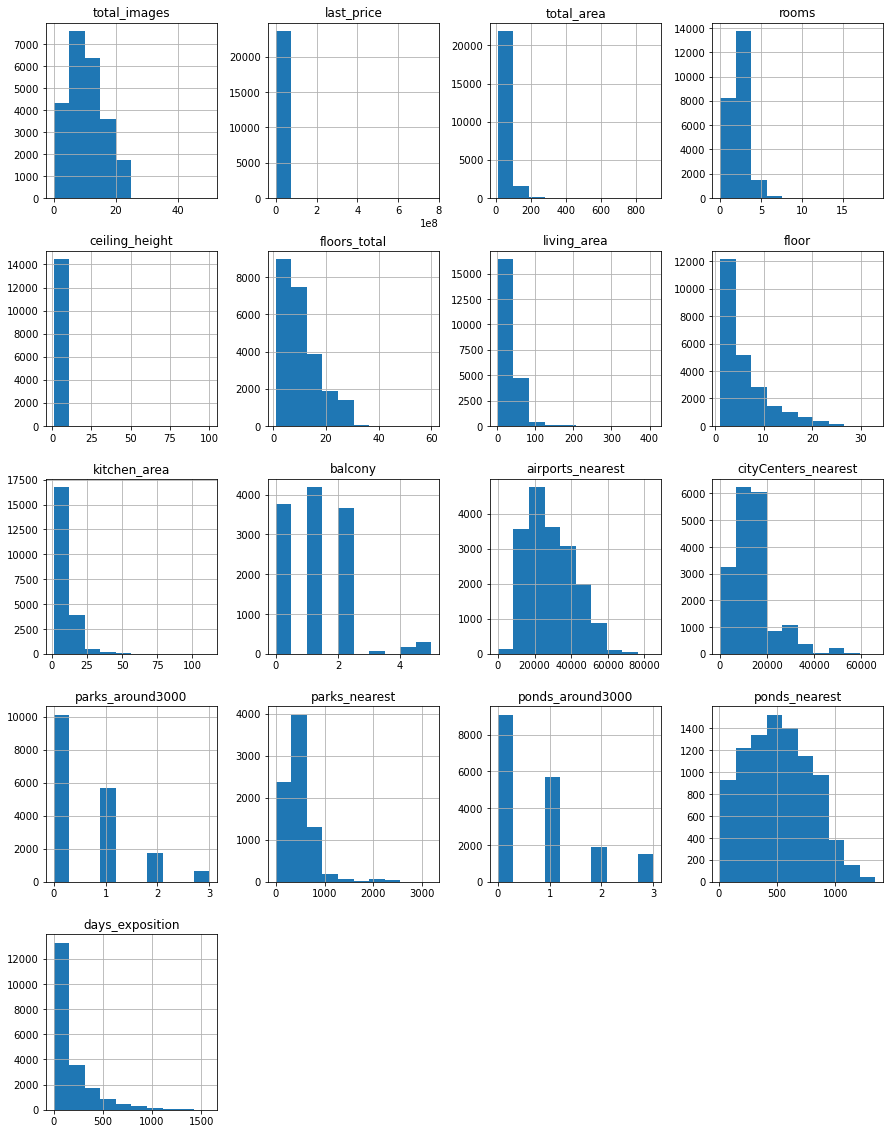

In [17]:
df.hist(figsize=(15, 20)) 
""

### Data preprocessing

In [18]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [20]:
# Dictionary with column descriptions
dict_df ={
    'airports_nearest': 'distance to the nearest airport in meters, m',
    'balcony': 'number of balconies, pcs',
    'ceiling_height': 'ceiling height in meters, m',
    'city_centers_nearest': 'distance to the city center in meters, m',
    'days_exposition': 'number of days the ad was active (from publication to withdrawal)',
    'first_day_exposition': 'publication date',
    'floor': 'floor',
    'floors_total': 'total number of floors in the building',
    'is_apartment': 'apartment (boolean type)',
    'kitchen_area': 'kitchen area in square meters, m²',
    'last_price': 'price at the time of withdrawal from publication',
    'living_area': 'living area in square meters, m²',
    'locality_name': 'name of the locality',
    'open_plan': 'open plan (boolean type)',
    'parks_around_3000': 'number of parks within a 3 km radius',
    'parks_nearest': 'distance to the nearest park in meters, m',
    'ponds_around_3000': 'number of ponds within a 3 km radius',
    'ponds_nearest': 'distance to the nearest pond in meters, m',
    'rooms': 'number of rooms',
    'studio': 'studio apartment (boolean type)',
    'total_area': 'total area of the apartment in square meters, m²',
    'total_images': 'number of photos of the apartment in the ad'
}

# Dictionary with values
dict_name = pd.Series(dict_df)

Let's translate the columns 'parks_around3000', 'ponds_around3000', and 'cityCenters_nearest'. We will change the column names to more stylistically appropriate ones.

In [21]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [22]:
df = df.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

2.1 Let's find and examine the missing values in the columns:

2.1.1 Определите, в каких столбцах есть пропуски.

Creating a function to detect missing values.

In [23]:
def empty_values(df):
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'Column Name': df.columns,
                                     'Missing Values': count_missing,
                                     '% Missing': percent_missing})
    
    return missing_value_df
empty_values(df).sort_values(by='% Missing', ascending=False)

,Column Name,Missing Values,% Missing
is_apartment,is_apartment,20924,88.29
parks_nearest,parks_nearest,15620,65.91
ponds_nearest,ponds_nearest,14589,61.56
balcony,balcony,11519,48.61
ceiling_height,ceiling_height,9195,38.80
airports_nearest,airports_nearest,5542,23.38
city_centers_nearest,city_centers_nearest,5519,23.29
ponds_around_3000,ponds_around_3000,5518,23.28
parks_around_3000,parks_around_3000,5518,23.28
days_exposition,days_exposition,3181,13.42


The dataset contains 23,699 rows in total, and missing values are present in most of the columns. The highest number of missing values is in the 'is_apartment' feature, with more than 20,000 missing values, as well as in the columns related to the distance from parks or ponds.

2.1.2 We will fill in the missing values where possible

To fill in the missing values, we will need two types of functions:

- Median imputation, grouped by a specific column.
- Median imputation based on the entire dataset."

In [25]:
# Function to fill missing values in a column of a dataframe with the median, grouped by a specific column:
# col_na - column with missing values, col_group - column for grouping. Column names should be in quotes..

def filling_median_group(col_na, col_group):
    print('Checking for missing values before processing: ', df[col_na].isna().sum())
    for value in df[col_group].unique():
        median_col_group = df.loc[df[col_group]==value, col_na].median()
        df.loc[(df[col_na].isna()) & (df[col_group]==value), col_na] = median_col_group
    print('Checking for missing values after processing: ', df[col_na].isna().sum())

In [26]:
# Function to fill missing values in a dataframe column with the overall median:
# col_na - column with missing values. Column names should be in quotes.

def filling_median(col_na):
    print('Checking for missing values before processing: ', df[col_na].isna().sum())
    df.loc[df[col_na].isna(), col_na] = df.loc[df[col_na], col_na].median()
    print('Checking for missing values after processing: ', df[col_na].isna().sum())

In [27]:
# is_apartment. If this field is not filled, we assume by default that the apartment is not an apartment.

print('Checking for missing values before processing:', df['is_apartment'].isna().sum())
df['is_apartment'] = df['is_apartment'].fillna('False')
print('Checking for missing values after processing:', df['is_apartment'].isna().sum())

Checking for missing values before processing: 20924
Checking for missing values after processing: 0


In [28]:
# ponds_around3000. If the field is not filled, we assume that there are no ponds.
print('Checking for missing values before processing:', df['ponds_around_3000'].isna().sum())
df.loc[df['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0
print('Checking for missing values after processing:', df['ponds_around_3000'].isna().sum())


Checking for missing values before processing: 5518
Checking for missing values after processing: 0


In [29]:
# parks_around3000. If the field is not filled, we assume that there are no nearby parks.
print('Checking for missing values before processing:', df['parks_around_3000'].isna().sum())
df.loc[df['parks_around_3000'].isna(), 'parks_around_3000'] = 0
print('Checking for missing values after processing:', df['parks_around_3000'].isna().sum())

Checking for missing values before processing: 5518
Checking for missing values after processing: 0


In [30]:
# parks_nearest. Fill the values with the median calculated for each grouping of parks_around_3000.
filling_median_group('parks_nearest', 'parks_around_3000')

Checking for missing values before processing:  15620
Checking for missing values after processing:  0


In [31]:
# balcony. Fill the values with 0 if there is no balcony.
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
print('Проверка наличия пропусков после обработки:', df['balcony'].isna().sum())

Проверка наличия пропусков после обработки: 0


In [32]:
# ceiling_height. Fill the NaN values with the median calculated for each room group.
filling_median_group('ceiling_height', 'rooms')

Checking for missing values before processing:  9195
Checking for missing values after processing:  1


After filling the values, one missing value remains.

In [33]:
df.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,3127.0,2.0,548.0,114.0


The values were filled with medians grouped by the number of rooms. However, there is only one object with 19 rooms. In this case, we will take the median ceiling height value from the objects with 16 rooms.

In [35]:
# Filling the missing ceiling height value in row 14498 with the median:
df.loc[14498, 'ceiling_height'] = df.loc[df['rooms']==16, 'ceiling_height'].median()
print('Checking for missing values: ', df['ceiling_height'].isna().sum())

Checking for missing values:  0


The missing values in the "ceiling_height" column have been filled with the median values calculated within each group of objects based on the number of rooms. The reason for the missing values is most likely the omission of these fields by the users.

In [36]:
# kitchen_area: Fill the missing values with the median values based on the total area.
filling_median_group('kitchen_area', 'total_area')

Checking for missing values before processing:  2278
Checking for missing values after processing:  205


In [37]:
print('Open plan:', df.query('kitchen_area.isna()')['open_plan'].value_counts())
print('Studio:', df.query('kitchen_area.isna()')['studio'].value_counts())

Open plan: False    187
True      18
Name: open_plan, dtype: int64
Studio: False    166
True      39
Name: studio, dtype: int64


In [39]:
#ponds_nearest. Missing values in the ponds_nearest column are filled with the median values calculated for each group 
# of values in the parks_around_3000 column. The reason for the missing values is that the column is automatically filled, 
# and the absence of a value in the parks_around_3000 column leads to missing values here.
filling_median_group('ponds_nearest', 'parks_around_3000') 

Checking for missing values before processing:  0
Checking for missing values after processing:  0


In [40]:
#floors_total. Missing values in the floors_total column are filled based on the location of the apartment. 
# We use the median values calculated for each locality_name to fill the missing values.
filling_median_group('floors_total','locality_name')

Checking for missing values before processing:  86
Checking for missing values after processing:  1


In [41]:
# There is one remaining value, which can be ignored.
print('Checking for missing values before processing:', df['floors_total'].isna().sum())
df = df.dropna(subset=['floors_total'])
print('Checking for missing values after processing:', df['floors_total'].isna().sum())

Checking for missing values before processing: 1
Checking for missing values after processing: 0


In [27]:
df['days_exposition'].describe()

count    20517.000000
mean       180.896086
std        219.730750
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [42]:
# The data in the column 'first_day_exposition' needs to be converted to datetime.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

[Text(0.5, 0, 'ad placement date'),
 Text(0, 0.5, 'Number of ads'),
 Text(0.5, 1.0, 'Distribution of ads with missing values in days_exposition by placement dates')]

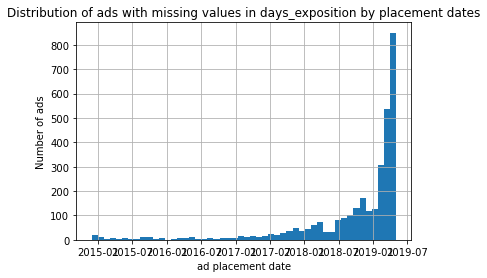

In [43]:
#Selecting ads with missing values in 'days_exposition':
day_no = df.query('days_exposition.isna()')

#Histogram of ad placement dates:
day_no['first_day_exposition'].hist(bins=50).set(xlabel='ad placement date',
ylabel='Number of ads',
title='Distribution of ads with missing values in days_exposition by placement dates')

From the histogram, it can be observed that the more recent the date, the more ads in the database have missing values in 'days_exposition'. It seems that these ads were not closed (either not sold or not removed after the sale). We will fill these missing values assuming that they "survived" at least until the latest ad placement date (let's consider this date as the database extraction date). In this case, the number of days in 'days_exposition' will be calculated as the difference between 'first_day_exposition' and the maximum date in days:

In [44]:
print('Check for missing values before processing:', df['days_exposition'].isna().sum())

# Find the maximum date
max_dt = df['first_day_exposition'].max()

# Fill missing values with the difference between 'first_day_exposition' and 'max_dt'
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (max_dt - df.loc[df['days_exposition'].isna(), 'first_day_exposition']).dt.days

print('Check for missing values after processing:', df['days_exposition'].isna().sum())

Check for missing values before processing: 3181
Check for missing values after processing: 0


2.2. Let's examine the data types in each column. We will determine the columns that need to have their data types changed and proceed with converting the data types in the selected columns.

In [31]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Columns that require changes in data types:

- Column 'floors_total': Convert from float to int.
- Column 'balcony': Convert from float to int.
- Column 'parks_around3000': Convert from float to int.
- Column 'ponds_around3000': Convert from float to int.
- Column 'days_exposition': Convert from float to int.
- Column 'is_apartment': Convert to bool.

In [45]:
# Converting from float to int data type
columns_to_convert = ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']

# Applying the astype() method to change the data type of columns in columns_to_convert
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [46]:
# Changing the data type from object to bool, as 'is_apartment' is a binary indicator (either True or False)
df['is_apartment'] = df['is_apartment'].astype(bool)

In [47]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                  int32
dtype: object

2.3. Let's examine the unique values in the column with the names and eliminate implicit duplicates.

It has been identified that:

- There are variations in writing style.
- Some names do not specify the type of locality.

In [48]:
print('Number of unique values before categorization:', len(df['locality_name'].unique()))

replace_dict = ['settlement ', 'urban-type settlement ', 'urban ', 'village ', 
                'cottage ', 'hamlet ', 'settlement near railway station ', 
                'railway station ', 'non-commercial gardening partnership ', 'gardening partnership ']

for value in replace_dict:
    df['locality_name'] = df['locality_name'].str.replace(value, '')

Number of unique values before categorization: 365


In [49]:
df.duplicated().sum()

0

Finally duplicates are removed.

2.4 Let's identify and handle rare and outlier values.

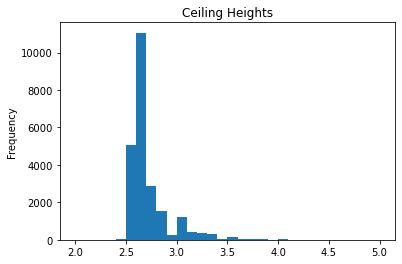

In [53]:
df['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=30, range=(2, 5))
plt.title('Ceiling Heights')
plt.show()

In [54]:
df['ceiling_height'].value_counts()


2.60    4736
2.50    3515
2.64    3515
2.65    2700
2.70    1574
        ... 
3.39       1
4.65       1
3.82       1
2.20       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [55]:
df['ceiling_height'].describe()

count    23698.000000
mean         2.722554
std          0.989715
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [56]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,8.5,0,Санкт-Петербург,41030.0,15543.0,0,3127.0,0,546.0,73
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0,3127.0,0,546.0,61
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0,3127.0,3,511.0,28
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,False,False,8.0,0,Волхов,NaN,NaN,0,3127.0,0,546.0,172
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19


We can see a single outlier in row 22869 with an extreme value. Let's replace this value with the nearest one in magnitude.

In [57]:
for i in df['ceiling_height'].unique():
    df.loc[(df['ceiling_height'] > 10) & (df['ceiling_height'].isna() == False), 'ceiling_height'] = \
    df['ceiling_height'] / 10

In [58]:
df['ceiling_height'].sort_values(ascending=True)

22590     1.00
22309     1.03
5712      1.20
15061     1.40
16934     1.75
         ...  
17442     8.00
3474      8.00
15743     8.00
5863      8.30
22869    10.00
Name: ceiling_height, Length: 23698, dtype: float64

Abnormal values for the ceiling height have been addressed.

Next, we will need functions to exclude abnormal values.

Function for visualizing outliers in a column.

In [62]:
# dataframe_name - the name of the dataframe where data is filtered by column
# column - the column in which outliers are calculated

def blowouts_info(dataframe_name, column):
    df = dataframe_name
    # Calculate the 1% and 99% percentiles as the boundaries of the interquartile range:
    outliers_min = round(df[column].quantile(0.1), 2)
    outliers_max = round(df[column].quantile(0.99), 2)
    # Outliers of the column based on the values outliers_min and outliers_max:
    print(column, 'lower outlier boundary:', outliers_min)
    print(column, 'upper outlier boundary:', outliers_max)

Function to remove outliers from values.

In [65]:
# Function to remove outliers from a dataframe dataframe_new
# dataframe_new - name of the dataframe where the data is filtered
# column - column in dataframe_new where outliers are calculated

def blowouts(dataframe_new, column):
    df_new = dataframe_new
    # Calculate 1st and 99th percentiles as the boundaries of the interquartile range in the original dataframe
    outliers_min = round(df[column].quantile(0.1), 2)
    outliers_max = round(df[column].quantile(0.99), 2)
    # Remove outliers from the column based on the boundaries outliers_min and outliers_max
    print(column, 'lower outlier boundary:', outliers_min)
    print(column, 'upper outlier boundary:', outliers_max)
    print('Number of rows in the new dataframe:', len(df_new.loc[(df_new[column] >= outliers_min) & (df_new[column] <= outliers_max)]))
    return df_new.loc[(df_new[column] >= outliers_min) & (df_new[column] <= outliers_max)]

In [64]:
blowouts_info(df,'total_area')
blowouts_info(df,'living_area')

total_area lower outlier boundary: 33.0
total_area upper outlier boundary: 197.22
living_area lower outlier boundary: 16.4
living_area upper outlier boundary: 120.0


In the category of outliers, there are apartments with a total area of either less than 22 sq.m. or more than 197 sq.m., and correspondingly with a living area of 120 sq.m. or less, or 16 sq.m. or less.

In [66]:
blowouts_info(df,'kitchen_area')

kitchen_area lower outlier boundary: 6.0
kitchen_area upper outlier boundary: 35.0


Excluded are apartments with an area of less than 6 square meters and more than 35 square meters.

In [67]:
blowouts_info(df,'last_price')

last_price lower outlier boundary: 2500000.0
last_price upper outlier boundary: 36000000.0


We keep the selection with prices greater than 2.5 million rubles and less than 360 million rubles.

In [68]:
# For convenience, let's create a column rounded to thousands
df['last_price_1'] = df['last_price']/1000


In [69]:
blowouts_info(df,'rooms')

rooms lower outlier boundary: 1.0
rooms upper outlier boundary: 5.0


We will keep a reasonable number of rooms from 1 to 5.

Taking into account the main filters, we will create a new dataframe.

In [70]:
df_normal = df
df_normal = blowouts(df_normal,'total_area')

total_area lower outlier boundary: 33.0
total_area upper outlier boundary: 197.22
Number of rows in the new dataframe: 21133


In [71]:
df_normal = blowouts(df_normal,'ceiling_height')

ceiling_height lower outlier boundary: 2.5
ceiling_height upper outlier boundary: 3.6
Number of rows in the new dataframe: 20904


In [72]:
df_normal = blowouts(df_normal,'last_price')

last_price lower outlier boundary: 2500000.0
last_price upper outlier boundary: 36000000.0
Number of rows in the new dataframe: 19133


In [73]:
df_normal = blowouts(df_normal,'rooms')

rooms lower outlier boundary: 1.0
rooms upper outlier boundary: 5.0
Number of rows in the new dataframe: 19043


In [74]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_1
count,23698.000000,2.369800e+04,23698.000000,23698.000000,23698.000000,23698.000000,21795.000000,23698.000000,23493.000000,23698.000000,18156.000000,18179.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000,23698.000000
mean,9.858469,6.541620e+06,60.346847,2.070597,2.695992,10.670225,34.456309,5.892438,10.457263,0.591105,28794.175314,14190.308488,0.469069,2228.281838,0.590936,525.532577,185.828382,6541.620151
std,5.682649,1.088724e+07,35.653754,1.078411,0.243192,6.587900,22.029772,4.885337,5.782481,0.959311,12631.046534,8607.630703,0.748543,1265.509374,0.884009,174.407298,233.383550,10887.237432
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000,12.190000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18584.250000,9238.000000,0.000000,601.000000,0.000000,496.000000,43.000000,3400.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.000000,0.000000,3127.000000,0.000000,546.000000,94.000000,4650.000000
75%,14.000000,6.800000e+06,69.875000,3.000000,2.700000,16.000000,42.300000,8.000000,11.810000,1.000000,37273.500000,16293.000000,1.000000,3127.000000,1.000000,546.000000,237.000000,6800.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1618.000000,763000.000000


In [75]:
df_normal.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_1
count,19043.000000,1.904300e+04,19043.000000,19043.000000,19043.000000,19043.000000,17621.000000,19043.000000,18988.000000,19043.000000,15856.000000,15876.000000,19043.000000,19043.00000,19043.000000,19043.000000,19043.000000,19043.000000
mean,10.096781,6.357693e+06,61.379707,2.150974,2.691887,11.399832,34.897776,6.244184,10.771649,0.633934,28927.723953,14210.611048,0.490732,2168.34858,0.633881,525.756551,187.276795,6357.693492
std,5.714070,4.102171e+06,24.652713,0.935055,0.188803,6.616364,16.451771,5.021980,5.093044,1.002810,12638.401410,8390.323729,0.743742,1283.44628,0.897411,180.718195,235.307449,4102.170729
min,0.000000,2.500000e+06,33.000000,1.000000,2.500000,1.000000,2.000000,1.000000,2.300000,0.000000,0.000000,181.000000,0.000000,1.00000,0.000000,13.000000,0.000000,2500.000000
25%,6.000000,3.950000e+06,43.500000,1.000000,2.600000,5.000000,21.000000,3.000000,8.000000,0.000000,18582.000000,9467.000000,0.000000,570.00000,0.000000,496.000000,43.000000,3950.000000
50%,10.000000,5.100000e+06,55.900000,2.000000,2.640000,9.000000,31.600000,5.000000,10.000000,0.000000,27078.500000,13164.000000,0.000000,3127.00000,0.000000,546.000000,95.000000,5100.000000
75%,14.000000,7.150000e+06,72.000000,3.000000,2.750000,16.000000,43.200000,9.000000,12.000000,1.000000,37374.250000,16268.000000,1.000000,3127.00000,1.000000,546.000000,238.000000,7150.000000
max,50.000000,3.600000e+07,197.000000,5.000000,3.600000,60.000000,164.700000,33.000000,65.000000,5.000000,84869.000000,65968.000000,3.000000,3127.00000,3.000000,1344.000000,1618.000000,36000.000000


### Add new columns to the table

3.1 Price per square meterа

In [76]:
df_normal['price_per_square_meter'] = df_normal['last_price'] / df['total_area']

In [77]:
df_normal['price_per_square_meter'] = df_normal['price_per_square_meter'].astype('int')

3.2 Day of publication of the announcement

In [78]:
df_normal['day_exposition'] = df_normal['first_day_exposition'].dt.weekday

3.3 Month of advertisement publication

In [79]:
df_normal['month_exposition'] = df_normal['first_day_exposition'].dt.month

3.4 Year of publication of the advertisement

In [80]:
df_normal['year_exposition'] = df_normal['first_day_exposition'].dt.year

3.5 Apartment floor type (values - "first", "last", "other")

Create a function to determine the category of floors in an apartment

In [81]:
def floors_category(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

In [82]:
df_normal['floor_group'] = df_normal.apply(floors_category, axis=1)  

3.6 Distance in km to city center

In [83]:
print('data type', df_normal['city_centers_nearest'].dtypes)
print('number of skips',df_normal['city_centers_nearest'].isna().sum())
if df_normal['city_centers_nearest'].dtypes != 'object':
    print('minimum value:',df_normal['city_centers_nearest'].min(), 'maximum value:', df_normal['city_centers_nearest'].max() )
print('unique values:', '\n', df_normal['city_centers_nearest'].value_counts())

data type float64
number of skips 3167
minimum value: 181.0 maximum value: 65968.0
unique values: 
 8460.0     61
20802.0    32
10720.0    29
8434.0     27
10364.0    26
           ..
17568.0     1
16851.0     1
12542.0     1
16857.0     1
6263.0      1
Name: city_centers_nearest, Length: 6927, dtype: int64


In [84]:
df_normal['city_centers_nearest_km'] = df_normal['city_centers_nearest']//1000

3.7 Checking the presence and correctness of new columns

In [85]:
df_normal.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,last_price_1,price_per_square_meter,day_exposition,month_exposition,year_exposition,floor_group,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,57,13000.0,120370,3,3,2019,other,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,3127.0,0,546.0,81,3350.0,82920,1,12,2018,first,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,5196.0,92785,3,8,2015,other,13.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,10000.0,100000,1,6,2018,other,8.0
6,6,3700000.0,37.3,2017-11-02,1,2.64,26,10.6,6,True,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,3127.0,0,546.0,155,3700.0,99195,3,11,2017,other,19.0


### We will conduct an exploratory data analysis

Let's check and describe the following parameters:
  - total area;
  - living space;
  - kitchen area;
  - the price of the object;
  - number of rooms;
  - ceiling height;
  - floor of the apartment;
  - floor type of the apartment (“first”, “last”, “other”);
  - the total number of floors in the house;
  - distance to the city center in meters;
  - distance to the nearest airport;
  - distance to the nearest park;
  - day and month of publication of the announcement

4.1 Study of area, price, number of rooms, ceiling heights

Offers on the housing market by area of apartments

In [86]:
df_normal[['total_area', 'living_area','kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,19043.000000,17621.000000,18988.000000
mean,61.379707,34.897776,10.771649
std,24.652713,16.451771,5.093044
min,33.000000,2.000000,2.300000
25%,43.500000,21.000000,8.000000
50%,55.900000,31.600000,10.000000
75%,72.000000,43.200000,12.000000
max,197.000000,164.700000,65.000000


Let's build histograms of the total and living areas of apartments:

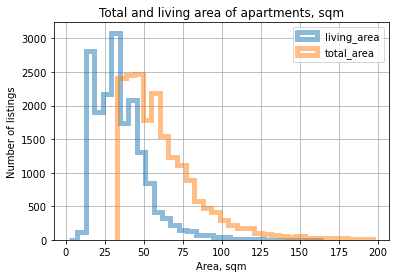

In [87]:
#total and living area according to all data
living_area_hist = df_normal['living_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=30,grid=True, legend=True,alpha=0.5,
                linewidth=5
                )
total_area_hist = df_normal['total_area'].plot(kind='hist', y='total_area',
                histtype='step',bins=30,grid=True, legend=True,alpha=0.5,
                title='Total and living area of ​​apartments, sqm',linewidth=5, ax=living_area_hist
                 ).set(xlabel='Area, sqm', ylabel='Number of listings')
plt.show()


For sale are apartments with a total area of 12 to 900 sq.m. Basically, this is housing with a total area of ​​30 to 100 sq.m. with a peak in the segment of 30-50 sq.m. and a slightly smaller segment of 50-75 sq.m.

The living area of the apartment is dominated by a range of 15-50 sq.m. with a peak of 20-30 sq.m

Let's check the limits of emissions of the total and living area of ​​apartments:

Next, consider the area of the kitchen by building a histogram of the area of ​​the kitchen throughout the dataset

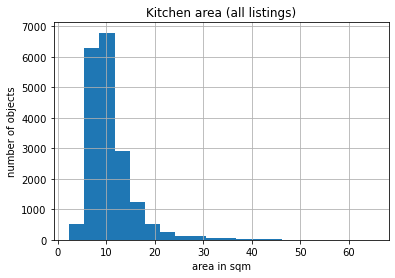

In [88]:
df_normal['kitchen_area'].hist(bins=20).set(title='Kitchen area (all listings)',
    xlabel='area in sqm', ylabel='number of objects');
plt.show()

The histogram shows a clear tail to the right. The main number of ads falls on apartments with an area of ​​​​up to 40 m. Let's build a histogram in these sample values

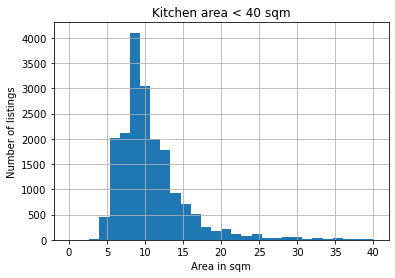

In [89]:
df_normal['kitchen_area'].hist(bins=30, range=(0, 40) ).set(title='Kitchen area < 40 sqm',
                 xlabel='Area in sqm', ylabel='Number of listings');

Basically, the size of the kitchen is from 4 to 17 meters. The peaks of the apartments are 5 and 9 sq.m, which is standard for small apartments.

Offers on the housing market in terms of ceiling heights

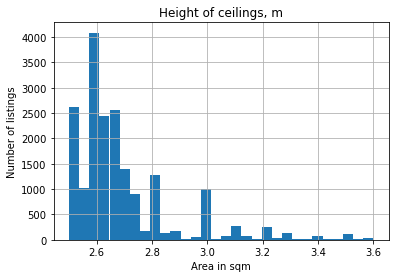

In [90]:
df_normal['ceiling_height'].hist(bins=30).set(title='Height of ceilings, m',
                 xlabel='Area in sqm', ylabel='Number of listings');

In [71]:
blowouts_info(df_normal,'ceiling_height')

ceiling_height нижняя граница выбросов 2.5
ceiling_height верхняя граница выбросов 3.4


We leave a sample with ceilings more than 2.5 m and less than 3.4 meters.

In a similar way, consider the cost

count     23698.000000
mean       6541.620151
std       10887.237432
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price_1, dtype: float64

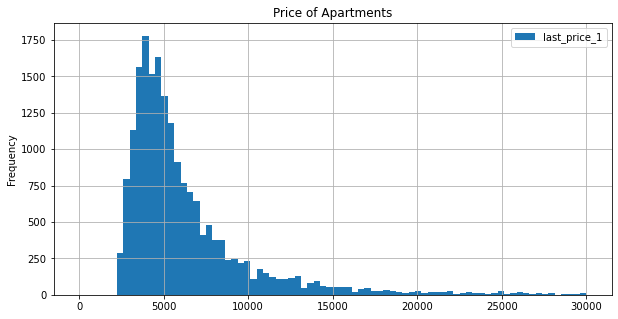

In [92]:
df_normal.plot(y = 'last_price_1', kind = 'hist', bins = 80, grid=True, figsize = (10,5), range = (0,30000))
plt.title('Price of Apartments')
df['last_price_1'].describe()

4.2 Location of the apartment:

Distance to the city center in meters;
Distance to the nearest airport;
Distance to nearest park

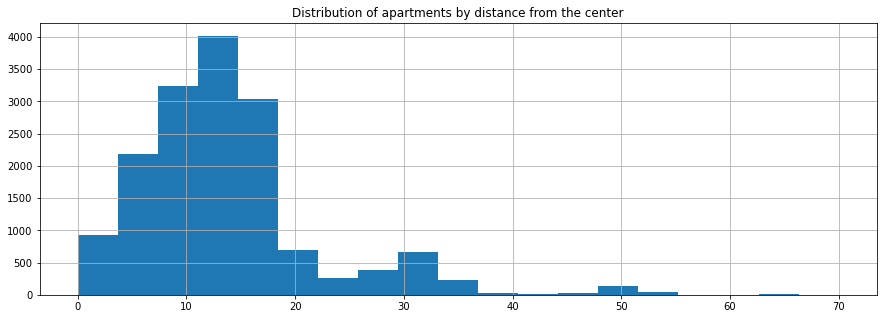

In [95]:
df_normal.hist('city_centers_nearest_km', bins = 19, grid=True, figsize = (15, 5), range = (0,70))
plt.title('Distribution of apartments by distance from the center')
plt.show()

In [96]:
df_normal['airports_nearest_km'] =df['airports_nearest']/1000

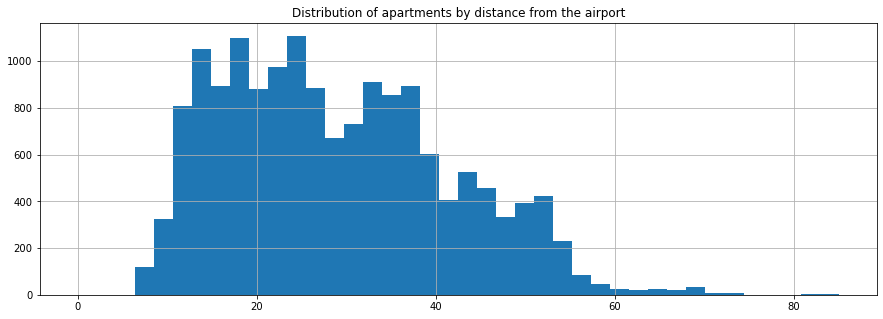

In [97]:
df_normal.hist('airports_nearest_km', bins = 40, grid=True, figsize = (15, 5), range = (0,85))
plt.title('Distribution of apartments by distance from the airport')
plt.show()

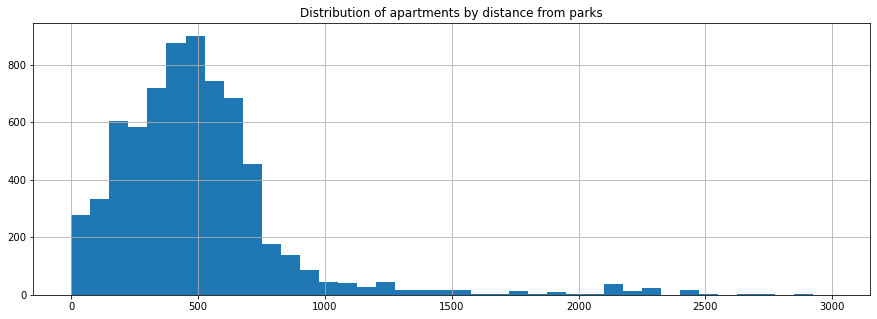

In [98]:
df_normal.hist('parks_nearest', bins = 40, grid=True, figsize = (15, 5), range = (0,3000))
plt.title('Distribution of apartments by distance from parks')
plt.show()

In [99]:
df_normal['parks_nearest_km'] =df['parks_nearest']/1000

The data is normally distributed. There are slight tails to the right

4.3 Consider how quickly apartments sold

Publication date. The data show a rather large spread between the mean and median values.

count    19043.000000
mean       187.276795
std        235.307449
min          0.000000
25%         43.000000
50%         95.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

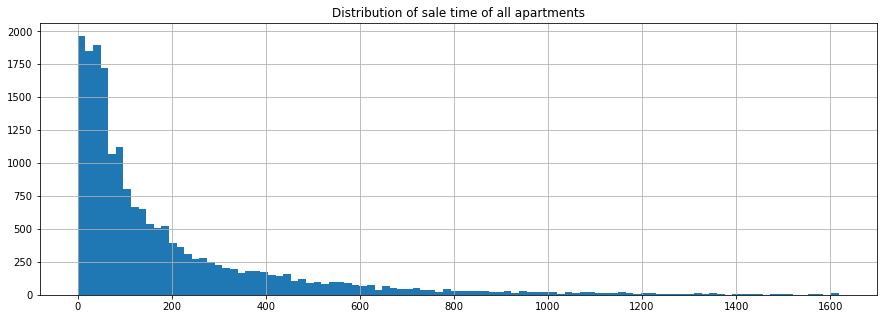

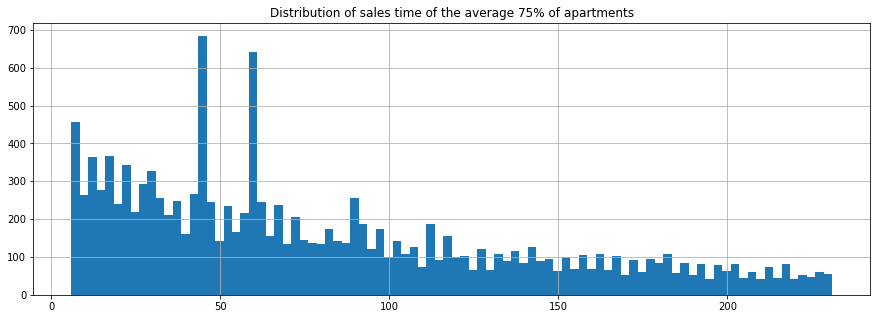

In [100]:
display(df_normal['days_exposition'].describe())

df_normal.hist('days_exposition', bins=100, figsize=(15, 5))
plt.title('Distribution of sale time of all apartments')
plt.show()
df_normal.hist('days_exposition', bins=90, figsize=(15, 5), range=(6, 231))
plt.title('Distribution of sales time of the average 75% of apartments')
plt.show()

The data is not normally distributed, the median value has a significant deviation from the mean. 

Consider the peak values:

In [101]:
df_normal.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(15)

days_exposition
45    583
60    534
7     217
30    198
90    170
4     166
3     150
11    150
15    142
18    141
14    135
9     133
5     130
10    130
8     129
Name: first_day_exposition, dtype: int64

Peak values ​​occur at 45, 60, 7, 30 and 90 days, respectively. It looks like the standard terms for the paid listing of an apartment for sale. Unfortunately, it is problematic to understand whether the apartment was sold or not in these terms, although these data make up more than 8% of the total array, and another 13% do not indicate the sale date. It is necessary to clarify the initial data - whether the apartments were sold at peak values ​​and whether it is possible to clarify the data on passes.

At the same time, with the current composition and quality of data, on average, apartments are sold for up to 3 months, there are sales in 1 day, there are sales that last more than a year.

Number of floors

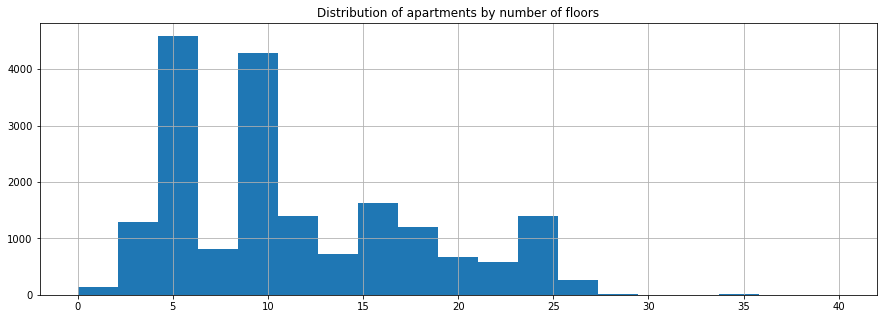

In [102]:
df_normal.hist('floors_total', bins = 19, grid=True, figsize = (15, 5), range = (0,40))
plt.title('Distribution of apartments by number of floors')
plt.show()

Obviously, 5-storey, 10-storey, 15- and 25-storey buildings are typical projects, so we see peaks in these values. There are more 5-storey buildings, which is also typical for regional cities.

Announcement frequency distribution depending on the day of the week

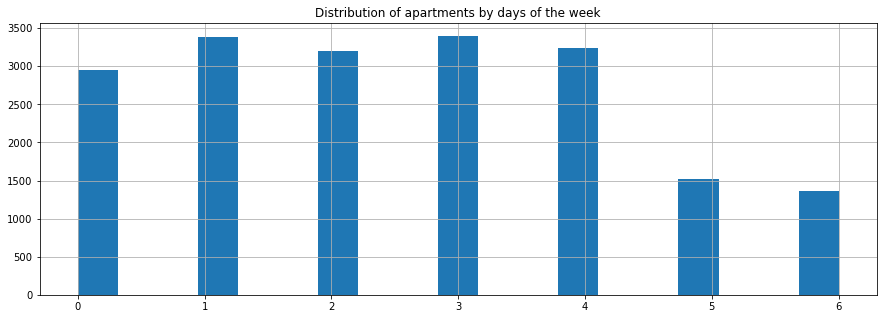

In [105]:
df_normal.hist('day_exposition', bins = 19, grid=True, figsize = (15, 5), range = (0,6))
plt.title('Distribution of apartments by days of the week')
plt.show()

Distribution of ad frequency depending on the month

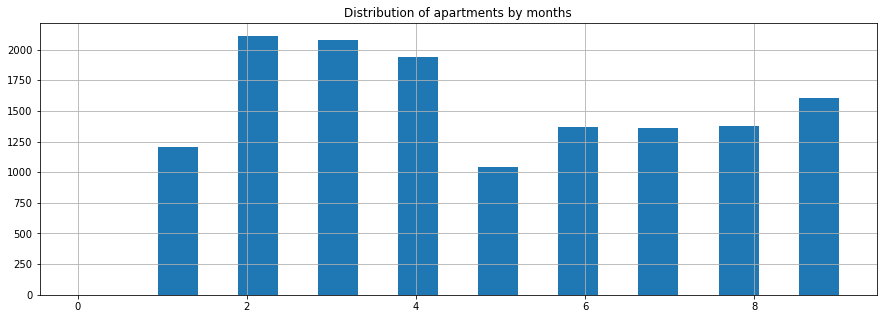

In [106]:
df_normal.hist('month_exposition', bins = 19, grid=True, figsize = (15, 5), range = (0,9))
plt.title('Distribution of apartments by months')
plt.show()

Most ads are in spring and autumn, which indicates some seasonality

4.3 Factors affecting the price of an apartment

We examine the dependence of the cost with the following parameters of the apartment:

- total area;
- living area;
- kitchen area;
- number of rooms;
- type of floor on which the apartment is located (first, last, second);
- placement dates (weekday, month, year).

In [107]:
df_normal[['last_price_1', 'total_area', 'kitchen_area', 'rooms', 'floor_group', 'city_centers_nearest']].corr()

,last_price_1,total_area,kitchen_area,rooms,city_centers_nearest
last_price_1,1.000000,0.767884,0.559033,0.438131,-0.339821
total_area,0.767884,1.000000,0.528654,0.753620,-0.211368
kitchen_area,0.559033,0.528654,1.000000,0.122812,-0.158592
rooms,0.438131,0.753620,0.122812,1.000000,-0.129448
city_centers_nearest,-0.339821,-0.211368,-0.158592,-0.129448,1.000000


The table shows that the greatest correlation is between the price and the footage of the total area and the area of ​​the kitchen, respectively. For a detailed analysis, we will use visualization tools.

[Text(0.5, 0, 'total area'), Text(0, 0.5, 'price 1 sq.m.')]

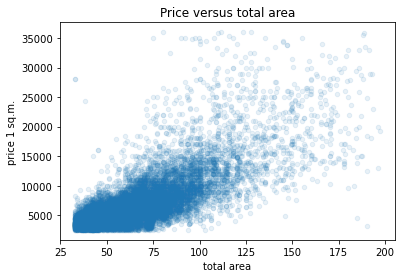

In [108]:
df_normal.plot(x='total_area', y='last_price_1', kind='scatter', alpha=0.1,
                       title='Price versus total area').set(
                       xlabel='total area', ylabel='price 1 sq.m.',
                       )

There is a direct dependence, according to the Pearson correlation - 0.77.

[Text(0.5, 0, 'kitchen area'), Text(0, 0.5, 'price 1 sq.m.')]

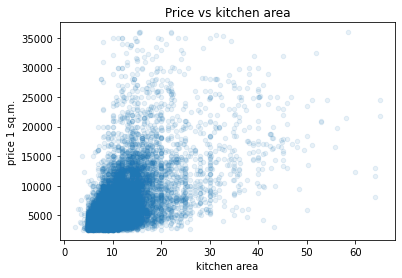

In [109]:
df_normal.plot(x='kitchen_area', y='last_price_1', kind='scatter', alpha=0.1,
                       title='Price vs kitchen area').set(
                       xlabel='kitchen area', ylabel='price 1 sq.m.',
                       )

A similar picture with the kitchen area.

[Text(0.5, 1.0, 'Price Dependence on Floor'),
 Text(0.5, 0, 'floor'),
 Text(0, 0.5, 'price')]

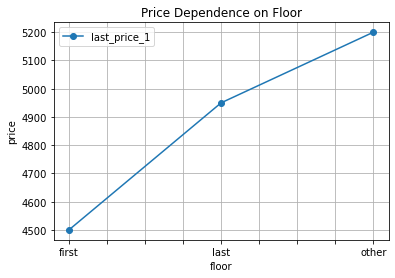

In [110]:
df_normal.pivot_table(index='floor_group', values='last_price_1', aggfunc='median').reset_index().plot(
                      x='floor_group', y='last_price_1', grid=True, style='o-').set(
                      title='Price Dependence on Floor',
                      xlabel='floor', ylabel='price')

Apartments on the first floor are the cheapest. The most expensive apartments are not on the last and on the first floors.

Consider the dependence on the graph

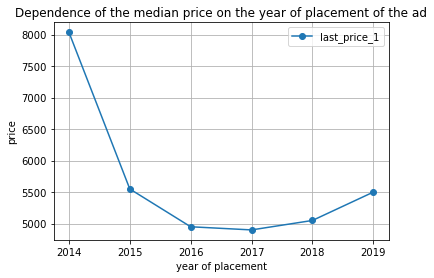

In [111]:
df_normal.pivot_table(index='year_exposition', values='last_price_1', aggfunc='median').reset_index().plot(
                      x='year_exposition', y='last_price_1', grid=True, style='o-').set(
                      title='Dependence of the median price on the year of placement of the ad',
                      xlabel='year of placement', ylabel='price');

The graph shows a clear decline in value from 2014 to 2016. The market sags significantly and recovers slightly by 2019.

Perhaps this is due to a decrease in the purchasing power of the population after the events of 2014.На графике наблюдается явное снижение стоимости с 2014 года до 2016. Рынок существенно проседает и немного восстанавливается к к 2019.

Возможно это связано со снижением покупательской способностью населения после событий 2014 года.

Consider the relationship between cost and placement month

[Text(0.5, 1.0, 'Dependence of the median price on the month of ad placement'),
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'price')]

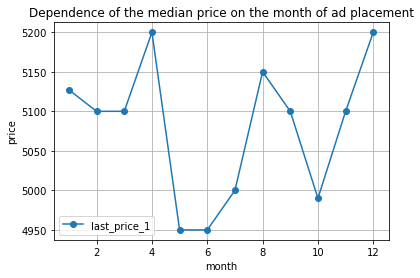

In [112]:
df_normal.pivot_table(index='month_exposition', values='last_price_1', aggfunc='median').reset_index().plot(
                      x='month_exposition', y='last_price_1', grid=True, style='o-').set(
                      title='Dependence of the median price on the month of ad placement',
                      xlabel='month', ylabel='price')

Price peaks are in April, August and November. Traditionally, a lull in the market occurs during the New Year holidays and vacation periods. At the same time, the spread of medical values ​​of the cost is about 9%.

Consider the dependence on the day of the week placement

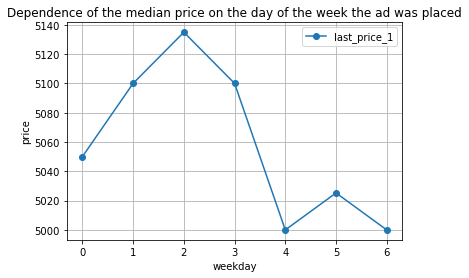

In [113]:
df_normal.pivot_table(index='day_exposition', values='last_price_1', aggfunc='median').reset_index().plot(
                      x='day_exposition', y='last_price_1', grid=True, style='o-').set(
                      title='Dependence of the median price on the day of the week the ad was placed',
                      xlabel='weekday', ylabel='price');

We can say that there is no dependence, the spread is less than 5%. At the same time, towards the end of the week, apartments in ads are put up a little cheaper, and on weekdays a little more expensive (perhaps due to the fact that realtors are engaged in placing ads on bunyas).

4.4 Determine the average price of one square meter in 10 settlements with the largest number of ads

Consider the 10 cities with the most ads.

In [115]:
top_10 = df_normal['locality_name'].value_counts().head(10)

#reset the index, leaving it as a column, rename the columns (let's designate the column in advance, where the average value will be 1 sq.m.)
top_10 = top_10.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
top_10

,locality_name,mean
0,Санкт-Петербург,13773
1,посёлок Мурино,398
2,посёлок Шушары,386
3,Всеволожск,334
4,Пушкин,310
5,посёлок Парголово,305
6,Колпино,297
7,деревня Кудрово,249
8,Гатчина,231
9,Сестрорецк,169


We calculate the average cost for each of the 10 cities.

,locality_name,mean
0,Санкт-Петербург,7151
1,Пушкин,6486
2,Сестрорецк,6462
3,посёлок Парголово,4601
4,деревня Кудрово,4543
5,посёлок Шушары,4300
6,Всеволожск,4096
7,Колпино,4035
8,посёлок Мурино,4004
9,Гатчина,3898


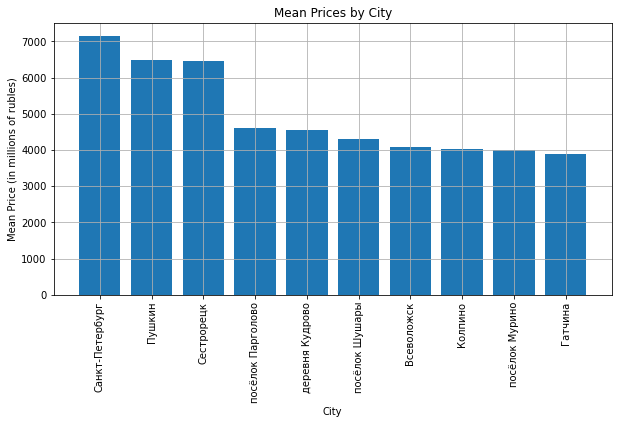

In [119]:
import matplotlib.pyplot as plt

# Calculate mean prices for each city
city_mean = []
for name in top_10['locality_name']:
    city_mean.append(round(df_normal.query('locality_name == @name')['last_price_1'].mean()))

# Add mean prices to top_10 dataframe
top_10['mean'] = city_mean

# Sort values in descending order and display the dataframe
sorted_top_10 = top_10.sort_values(by='mean', ascending=False, ignore_index=True)
display(sorted_top_10)

# Plot histogram of mean prices
plt.figure(figsize=(10, 5))
plt.bar(sorted_top_10['locality_name'], sorted_top_10['mean'])
plt.title('Mean Prices by City')
plt.xlabel('City')
plt.ylabel('Mean Price (in millions of rubles)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


The most expensive apartments are in St. Petersburg, Vyborg has the cheapest apartments.

4.5 Impact on the cost of objects of distance to the city center

Consider the dependence of the price of an apartment in St. Petrbuog on proximity to the center

In [120]:
locality_spb = df_normal.query('locality_name == "Санкт-Петербург"')

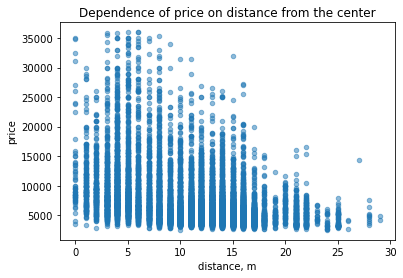

In [121]:
locality_spb.plot(x='city_centers_nearest_km', y='last_price_1', kind='scatter', alpha=0.5,
                       title='Dependence of price on distance from the center').set(
                       xlabel='distance, m', ylabel='price');

In [122]:
locality_spb_pivot = locality_spb.pivot_table(index='city_centers_nearest_km', 
                                              values='last_price_1', aggfunc='mean').reset_index()

locality_spb_pivot

,city_centers_nearest_km,last_price_1
0,0.0,12689.319931
1,1.0,10915.577778
2,2.0,10215.351515
3,3.0,10001.900815
4,4.0,11115.953661
5,5.0,10639.760494
6,6.0,10317.044048
7,7.0,9241.225742
8,8.0,8811.418444
9,9.0,6791.306193


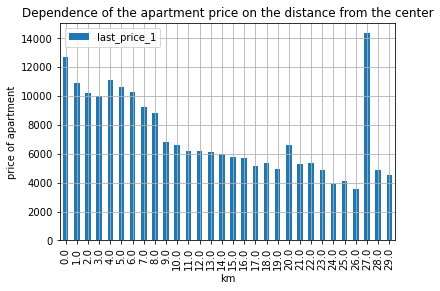

In [123]:
locality_spb_pivot.plot(x='city_centers_nearest_km', y='last_price_1', kind= 'bar',
                        grid=True,
                      title='Dependence of the apartment price on the distance from the center').set(
                      xlabel='km', ylabel='price of apartment');

In general, there is a correlation between the cost of an apartment and the distance from the center. The closer to the center, the higher the cost. At the same time, a peak value is visible at a distance of 27 meters, associated with one real estate object.

### General conclusion

The data presented in the dataframe contained gaps, explicit and implicit duplicates, technical errors and errors associated with the human factor. Some inaccuracies and omissions could be filled in (or it was possible to neglect), additional information is required from the part of the data ....

For convenience, new columns have been added - price per sq. meter, as well as columns with days, months and years, the category of floors.

As a result of checking the influence of factors, it was revealed:
1. The main influence on the cost of an apartment is provided by the city in which this apartment is sold, so on average, an apartment in Vyborg is 2 times cheaper than an apartment in St. Petersburg.
2. About 15% of the cost per square meter is affected by the number of rooms, so in a 3-room apartment the price is less than in a 1-room or 5-room apartment,
3. In median values, the first floors are traded slightly cheaper than the last, but the difference is small, less than 10%.
4. About 15% of the cost per square meter is affected by the year the ad was placed. This is not surprising, and corresponds to the general state of the economy, the impact on the price of external factors.
5. Other factors do not have a significant impact on the price per square meter. meters.
6. The maximum cost of housing - in St. Petersburg, the minimum - in Vsevolzhsk. The offers of the real estate market in the center of St. Petersburg are characterized by a slightly larger area and price than other areas, but in general, there are also enough offers for apartments with a minimum area.